# Assignment 3 – Robot in a maze

In the  fourth assignment, you will delve into the application of RL algorithms to address the real-world challenge of navigating a robot through a maze dubbed 'robot in a maze'. The primary objectives of this assignment include:

 -   Formalizing a practical problem into a Markov Decision Process (MDP).
 -   Gaining familiarity with the OpenAI Gym framework (recently renamed as Gymnasium) and utilizing it to implement RL agents.
 -   Applying SARSA and Q-learning algorithms to solve the 'robot in a maze' MDP problem.
 -   Evaluating the outcomes of the reinforcement learning process and interpreting your findings.
 -   Reflecting on the distinctions between the two types of RL algorithms employed.

By accomplishing these objectives, you will not only enhance your understanding of RL algorithms but also develop practical skills in formulating and solving complex problems in the context of autonomous navigation within a maze.

In this assignment, you will be developing a robot to navigate its way through a maze. The project is divided into three parts (5 subtasks).

  1. In the first part, you will familiarize yourself with the OpenAI Gym/Gymnasium framework.
  2. In the second part, we have implemented the environment for you based on the Gym/Gymnasium framework. Your tasks include:  
     2.1. formalizing the problem as an MDP model,    
     2.2. implementing your own RL agents, and      
     2.3. training them to find the shortest route out of a maze.
  3. Finally, in the third part, you will evaluate and interpret the results obtained from the implemented RL agents


## 1. OpenAI gym

Gym/Gymnasium (https://gymnasium.farama.org/) is a widely used standard toolkit for developing and comparing reinforcement learning algorithms. Gymnasium is the maintained fork of OpenAI’s Gym library (more on this recent change is available if you're interested: https://farama.org/Announcing-The-Farama-Foundation).

Gym/Gymnasium makes no assumptions about the structure of your agent and is compatible with any machine learning library, such as TensorFlow or Theano.

The library is a collection of test problems — environments — that you can use to develop your reinforcement learning algorithms. These environments have a shared interface, allowing you to write general algorithms.

First, we download and install the Gym/Gymnasium library. Then, import the Gymnasium class.

In [107]:
!pip install gymnasium


We are now going to explain how the RL framework of gym works. 
- An **ENVIRONMENT**, 
- You also have an **AGENT**,
- In MDP problems, such as ours, the **ENVIRONMENT** provides an **OBSERVATION**, which represents the state of the **ENVIRONMENT** at the current moment.
- The agent takes an **ACTION** based on its **OBSERVATION**,
<!-- When a single **ACTION** is chosen and fed to our **ENVIRONMENT**, the **ENVIRONMENT** measures how good the action was taken and produces a **REWARD**, which is usually a numeric value. -->
- When the agent takes an ACTION, the ENVIRONMENT assesses the effectiveness of the action and generates a REWARD, which is usually a numeric value.

Please read the 'Basic usage' https://gymnasium.farama.org/content/basic_usage/ for better understanding the framework.  And do not forget import gymnasium before running other codes.

In [108]:
import gymnasium as gym

 ## 2. Tasks

Next, you will tackle a practical Markov Decision Process (MDP) problem, the 'robot in a maze,' based on the gym framework. Your task involves implementing an RL agent and training it to discover the shortest route to achieve the maze goal. In this MDP, the environment is represented as a grid world (a maze), with the agent being a robot. At each time step, the robot begins at a random location and can move within the grid world. The overarching objective is to find the way out, reaching the final location. Consequently, you will need to identify a fixed goal position within the maze.

### 2.1 Model the practical task into a MDP

To solve a RL problem, we start with formalizing the problem into a MDP model. Please describe this MDP model in your report. 

Notice: No empricial data provided in this assignment, so the point of 'data description and exploration' will be given to this step. 

While exploring your MDP model, you shall think about questions such as:
- What is the environment? How does it look like?
- What simulated data can your RL agent observe from the environment? How does it look like?
- Which data is considered as the state? Which data is considered as the reward?

#### Set up the environment

There is no need to implement your own environment; you should use the environment provided in the file **environment.py**. However, please ensure to take a look at it so that you understand the inner workings of this environment.

The core gym interface is **Env**, which serves as the unified environment interface. The following are the Env methods you should be familiar with:

- reset(self): Reset the environment's state and return the observation.
- step(self, action): Advance the environment by one timestep and return the observation, reward, done, and info.
- render(self, mode='rgb_array'): Render one frame of the environment. The default mode will produce something human-friendly, such as a pop up window. However, in this assignment, there is no need to create a pop-up window.

Please note that you need to install the [mazelab](https://github.com/yupei-du/mazelab.git) package, from **Yupei Du's** repository, to run the environment (a file with required packages is also provided). If you run the cell below for the first time, make sure to restart the IPython notebook at least once.


In [109]:
# !git clone https://github.com/yupei-du/mazelab.git
!pip install -e mazelab
# !pip install pandas
# !pip install seaborn

Obtaining file:///Users/mccv/Documents/School/APML/APML-OPDRACHT-3/mazelab
ERROR: file:///Users/mccv/Documents/School/APML/APML-OPDRACHT-3/mazelab does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


You can now check whether the required packages (e.g. mazela, pandas, tqdm, seaborn) are installed. Please install the ones are missing. 

ATTENTION: To run the given code, please use the python version 3.7-3.9, and the numpy version < 1.23

In [110]:
%pip install -e "./mazelab"


Obtaining file:///Users/mccv/Documents/School/APML/APML-OPDRACHT-3/mazelab
ERROR: file:///Users/mccv/Documents/School/APML/APML-OPDRACHT-3/mazelab does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


In [111]:
from mazelab.generators import random_maze, morris_water_maze
print("mazelab.generators werkt")


mazelab.generators werkt


In [112]:
import os

print("mazelab map:")
print(os.listdir("mazelab"))


mazelab map:
['env.py', 'object.py', '__init__.py', 'solvers', '__pycache__', 'color_style.py', 'motion.py', 'maze.py', 'generators']


In [113]:
!pip install tqdm

We also provide a few helper functions to make it easier to debug your agents. 
 - `animate_run` will enable you to see the agent's behavior. It takes a list of images which can be produced by the `env.render` function of the environment
 - `visualize_agent_brain` will provide you with a way to visualize the agents learned q_table. Use it after you have implemented and trained your agents. The first plot will show the highest q-value per state (position on the map) and the second will tell you which action the agent would choose at that state/position. It takes the environment and the agent as input.

Below you will find a basic example of how the animation function works. Please notice that: whenever you **reset()** the environment, the agent will start at a random position (a different state). 

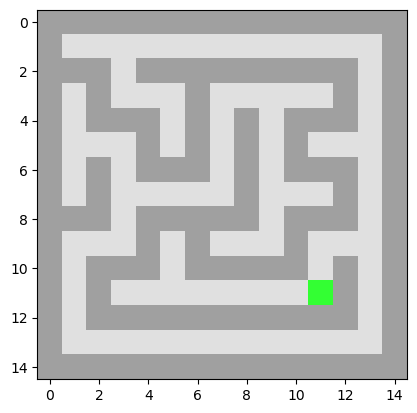

In [114]:
# The helper functions

from IPython import get_ipython
import random
from mazelab.generators import random_maze, morris_water_maze
import matplotlib.pyplot as plt
from IPython import display
from mazelab.solvers import dijkstra_solver
import seaborn as sns
from tqdm.notebook import tqdm
from environment import TaskEnv
from typing import Tuple, List
import itertools as it
import numpy as np
import pandas as pd

def animate_run(data:List[np.ndarray]):
    init_img = data[0]
    remaining_img = data[1:]
    img_container = plt.imshow(init_img)  # only call this once
    for img in remaining_img:
        img_container.set_data(img)  # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)


def visualize_agent_brain(agent, env: TaskEnv):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.set_title("Highest state value at position (x,y)")
    state_value_map = agent.q_table.max(axis=2)
    sns.heatmap(state_value_map, ax=ax1)

    ax2.set_title("Chosen action at position (x,y)")
    n = env.action_space.n + 1
    path = env.maze.objects.free.positions
    decisions_map = np.array([[x_, y_, agent.select_action([x_, y_]) + 1] for x_, y_ in path])
    state_action_map = np.zeros_like(agent.q_table.max(axis=2))
    state_action_map[decisions_map[:, 0], decisions_map[:, 1]] = decisions_map[:, 2]
    cmap = sns.color_palette("viridis", n)
    sns.heatmap(state_action_map, cmap=cmap, ax=ax2)
    colorbar = ax2.collections[0].colorbar
    r = (colorbar.vmax) - colorbar.vmin
    colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
    colorbar.set_ticklabels(['N/A', 'north', 'south', 'west', 'east'])
    fig.tight_layout()
    return plt.show()


env = TaskEnv()
env.reset()
impassable_array = env.unwrapped.maze.to_impassable()
motions = env.unwrapped.motions
start = env.unwrapped.maze.objects.agent.positions[0]
goal = env.unwrapped.maze.objects.goal.positions[0]
actions = dijkstra_solver(impassable_array, motions, start, goal)
print(actions)

imgs = []
rewards = 0.0
for action in actions:
    _, reward, _, _ = env.step(action)
    rewards += reward
    imgs.append(env.render("rgb_array"))
print(rewards)

animate_run(imgs)
plt.show()

### 2.2  Implement the agents 

In this part, you are expected to implement two RL agents. 

- Agent 1 uses the Q-learning algorithm to learn the optimal solution
- Agent 2 uses the SARSA algorithm to learn the optimal solution. To decide the action to take at each time step,  this agent uses the epsilon greedy action selection.

Here, we have also provided an example agent: the Random Agent.  It follows a random policy to move at each step (randomly selecting an action). You can use this example agent as a baseline to evaluate your agents.


In [115]:
# Random agent
class RandomAgent():
    def __init__(self,
                 env: TaskEnv,
                 exploration_rate: float = None,
                 learning_rate: float = None,
                 discount_factor: float = None) -> int:
        self.epsilon = 1  # A random agent "explores" always, so epsilon will be 1
        self.alpha = 0  # A random agent never learns, so there's no need for a learning rate
        self.gamma = 0  # A random agent does not update it's q-table. Hence, it's zero.
        self.q_table = np.zeros(env.observation_space.shape + (env.action_space.n, ), dtype=float)
        self.actions = env.action_space

    def select_action(self, state: Tuple[int, int], use_greedy_strategy: bool = False) -> int:
        if not use_greedy_strategy:
            if random.random() < self.epsilon:
                next_action = self.actions.sample()
                return next_action

        x, y = state
        max_val = np.max(self.q_table[x, y, :])
        find_max_val = np.where(self.q_table[x, y, :] == max_val)
        next_action = np.random.choice(find_max_val[0])
        return next_action

    def learn(self, state, action, next_state, reward, done):
        return None


In [ ]:
# Agent 1 - Q-learning
class Agent1():
    def __init__(self,
                 env: TaskEnv,
                 exploration_rate: float = 0.1,
                    learning_rate: float = 0.5,
                    discount_factor: float = 0.9) -> int:
            self.epsilon = exploration_rate
            self.alpha = learning_rate
            self.gamma = discount_factor
            self.q_table = np.zeros(env.observation_space.shape + (env.action_space.n, ), dtype=float)
            self.actions = env.action_space
    
    def select_action(self, state: Tuple[int, int], use_greedy_strategy: bool = False) -> int:
            if not use_greedy_strategy:
                if random.random() < self.epsilon:
                    next_action = self.actions.sample()
                    return next_action
    
            x, y = state
            max_val = np.max(self.q_table[x, y, :])
            find_max_val = np.where(self.q_table[x, y, :] == max_val)
            next_action = np.random.choice(find_max_val[0])
            return next_action
    
    def learn(self, state, action, next_state, reward, done):
            x, y = state
            next_x, next_y = next_state
            best_next_q = np.max(self.q_table[next_x, next_y, :])
            td_target = reward + (self.gamma * best_next_q * (1 - int(done)))
            td_delta = td_target - self.q_table[x, y, action]
            self.q_table[x, y, action] += self.alpha * td_delta

env = TaskEnv()
agent = Agent1(env)

n_episodes = 1000

for episode in range(n_episodes):
    state = env.reset()
    done = False

    while not done:
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        agent.learn(state, action, next_state, reward, done)
        state = next_state

### 2.3 Run the simulation

Now, you write code for running a simulation. In each run, you shall setup the epsilon parameter. 

In [ ]:
# Performance evaluation functions and plots

# We score our agents based on a ratio between the length of the path taken by the agent and the optimal path length calculated using Dijkstra's algorithm
def calculate_dijkstra_length(env: TaskEnv) -> float:
    impassable_array = env.unwrapped.maze.to_impassable()
    motions = env.unwrapped.motions
    start = env.unwrapped.maze.objects.agent.positions[0]
    goal = env.unwrapped.maze.objects.goal.positions[0]
    actions = dijkstra_solver(impassable_array, motions, start, goal)
    return len(actions)

def plot_learning_curve(ratios, epsilons=None, window_size=50, title='Agent Learning Progress', poly_degree=1):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    ax1.scatter(range(len(ratios)), ratios, alpha=0.3, s=10, color='blue', label='Episode performance')
    
    if len(ratios) >= window_size:
        moving_avg = np.convolve(ratios, np.ones(window_size)/window_size, mode='valid')
        ax1.plot(range(window_size-1, len(ratios)), moving_avg, 
                color='red', linewidth=2, label=f'{window_size}-episode moving avg')
    
    x = np.arange(len(ratios))
    coeffs = np.polyfit(x, ratios, poly_degree)
    poly_fit = np.polyval(coeffs, x)
    poly_fit.clip(0,1, out=poly_fit)
    ax1.plot(x, poly_fit, color='purple', linewidth=2, 
            label=f'Polynomial fit (degree {poly_degree})', linestyle='-', alpha=0.8)
    
    ax1.set_xlabel('Episode', fontsize=12)
    ax1.set_ylabel('Path Efficiency (Dijkstra ratio)', fontsize=12, color='blue')
    ax1.set_title(title, fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, alpha=0.3)
    plt.tight_layout()

    if epsilons is not None:
        ax2 = ax1.twinx() 
        ax2.plot(range(len(epsilons)), epsilons, color='green', linewidth=2, 
                label='Epsilon (exploration rate)', linestyle='--')
        ax2.set_ylabel('Epsilon Value', fontsize=12, color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')
    else:
        ax1.legend()
    
    
    plt.show()

Best score achieved: 35.02702702702703


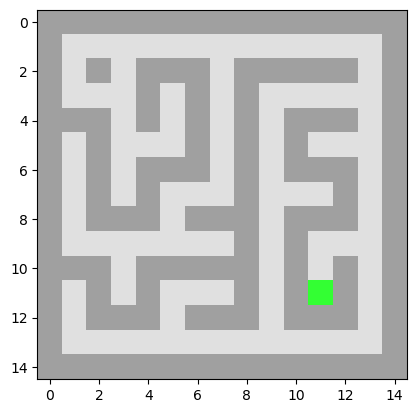

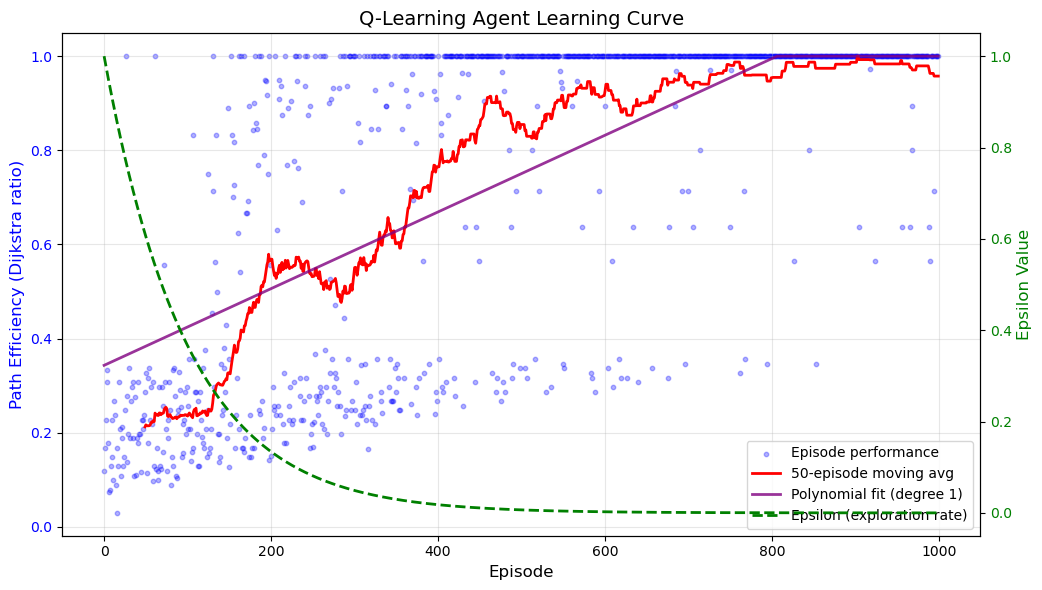

In [ ]:
# Agent 1 - Q-learning 
def agent_1_learn(start_epsilon, epsilon_decay, episodes, gamma = 0.9, min_epsilon=0, env=None):
  if env is None:
      env = TaskEnv()
  agent = Agent1(env, discount_factor=gamma)
      
  frames = []

  agent.epsilon = start_epsilon
  n_episodes = episodes

  best_episode_score = float('-inf')
  best_episode_frames = []
  best_episode_epsilon = agent.epsilon

  ratios = []
  epsilons = []

  for episode in range(n_episodes):
      state = env.reset()
      dijkstra = calculate_dijkstra_length(env)
      done = False
      frames = []
      num_actions = 0
      
      while not done:
          action = agent.select_action(state)
          num_actions += 1
          next_state, reward, done, _ = env.step(action)
          agent.learn(state, action, next_state, reward, done)
          state = next_state
          frames.append(env.render("rgb_array"))

      ratio = dijkstra / num_actions
      ratios.append(ratio)

      # To choose the best episode to visualize, we score based on ratio and use reward to weed out timed-out episodes 
      # and multiply by dijkstra to prioritize longer optimal paths, to prevent bias towards short mazes
      score = ratio * reward * dijkstra 
      best_episode_score = max(score, best_episode_score)
      if best_episode_score == score:
          best_episode_frames = frames.copy()
          best_episode_epsilon = agent.epsilon

      # epsilon decay after each episode
      epsilons.append(agent.epsilon)
      agent.epsilon = max(min_epsilon, agent.epsilon * (1 - epsilon_decay))

  return best_episode_frames, best_episode_score, best_episode_epsilon, ratios, epsilons
      
frames, best_episode_score, best_episode_epsilon, ratios, epsilons  = agent_1_learn(start_epsilon=1, epsilon_decay=0.01, episodes=1000)
animate_run(frames)
print(f"Best score achieved: {best_episode_score}")

plot_learning_curve(ratios, epsilons, window_size=50, title='Q-Learning Agent Learning Curve')

In [ ]:
# Agent 2 - SARSA
class Agent2():
    def __init__(self,
                 env: TaskEnv,
                 exploration_rate: float = 0.1,
                 learning_rate: float = 0.5,
                 discount_factor: float = 0.9):

        self.epsilon = exploration_rate
        self.alpha = learning_rate
        self.gamma = discount_factor
        self.q_table = np.zeros(env.observation_space.shape + (env.action_space.n,))
        self.actions = env.action_space

    def select_action(self, state, use_greedy_strategy=False):
        if not use_greedy_strategy:
            if random.random() < self.epsilon:
                return self.actions.sample()

        x, y = state
        max_val = np.max(self.q_table[x, y, :])
        find_max_val = np.where(self.q_table[x, y, :] == max_val)
        return np.random.choice(find_max_val[0])

    def learn(self, state, action, next_state, next_action, reward, done):
        x, y = state
        next_x, next_y = next_state
        next_q = self.q_table[next_x, next_y, next_action]

        td_target = reward + self.gamma * next_q * (1 - int(done))
        td_delta = td_target - self.q_table[x, y, action]
        self.q_table[x, y, action] += self.alpha * td_delta

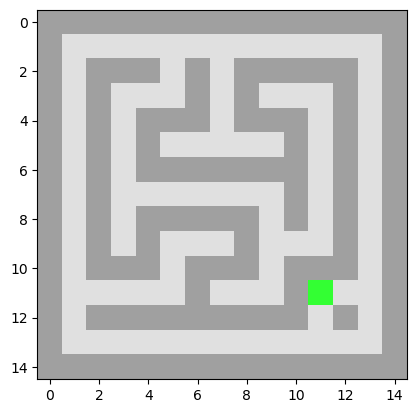

Best score achieved: 40.0


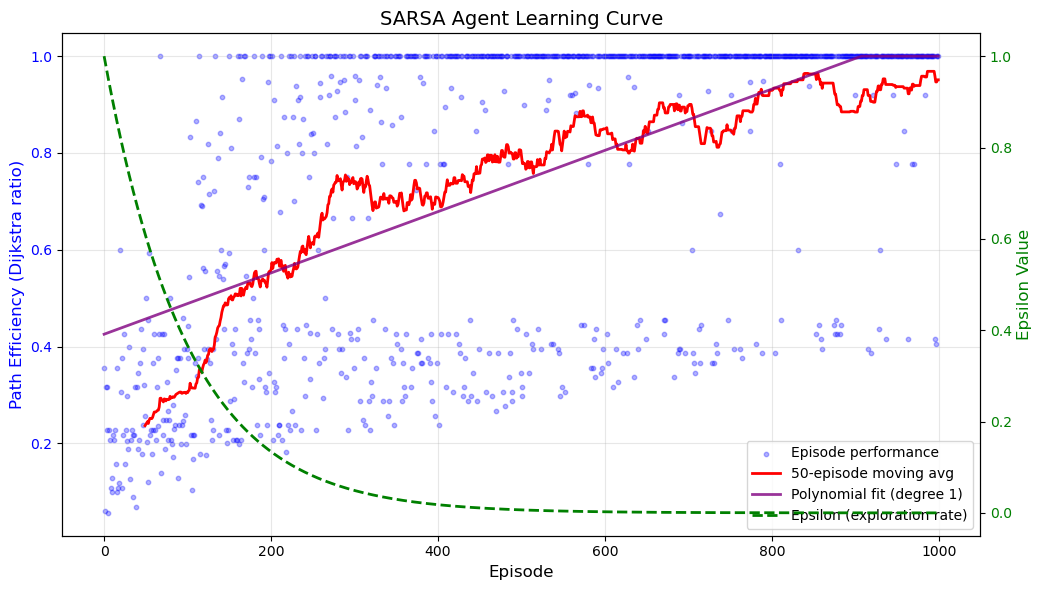

In [ ]:
def agent_2_learn(start_epsilon, epsilon_decay, episodes, gamma = 0.9, min_epsilon=0, env=None):
    if env is None:
        env = TaskEnv()
    agent = Agent2(env, discount_factor=gamma)

    agent.epsilon = start_epsilon
    n_episodes = episodes

    ratios = []
    epsilons = []
    
    best_episode_score = float('-inf')
    best_episode_frames = []
    best_episode_epsilon = agent.epsilon

    for episode in range(n_episodes):
        state = env.reset()
        dijkstra = calculate_dijkstra_length(env)
        done = False
        frames = []
        num_actions = 0

        epsilons.append(agent.epsilon)
        
        action = agent.select_action(state)

        while not done:
            next_state, reward, done, _ = env.step(action)
            num_actions += 1
            frames.append(env.render("rgb_array"))
            
            next_action = agent.select_action(next_state) if not done else 0
            
            agent.learn(state, action, next_state, next_action, reward, done)
            
            state = next_state
            action = next_action
            
        ratio = dijkstra / num_actions
        ratios.append(ratio)
        score = ratio * reward * dijkstra
        
        if score > best_episode_score:
            best_episode_score = score
            best_episode_frames = frames.copy()
            best_episode_epsilon = agent.epsilon

        agent.epsilon = max(min_epsilon, agent.epsilon * (1 - epsilon_decay))
        
    return best_episode_frames, best_episode_score, best_episode_epsilon, ratios, epsilons

frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_2_learn(start_epsilon=1, epsilon_decay=0.01, episodes=1000)
animate_run(frames)
plt.show()
print(f"Best score achieved: {best_episode_score}")

plot_learning_curve(ratios, epsilons, window_size=50, title='SARSA Agent Learning Curve')


 ## 3. Play with parameters and analyse results
 
Finally, you will describe, evaluate, and interpret the results obtained from the two RL agents. Additionally, compare your agents with the provided Random Agent. Feel free to utilize the provided helper functions for evaluating your agents. Some important points are:

- Both quantified evaluation and human evaluation are needed in the report. The quantified evaluation should focus on the measurement of reward. In the human evaluation, you can use the provided visual tools to interpret your results. Your report should include at least one plot presenting comparable measures for the different agents.

- While evaluating the results of Agent 2 (with SARSA algorithm), please try at least 2 different values of **epsilon** (expect 0) and discuss the influence of different epsilon values on the results. In the end, please identify a reasonable epsilon value that could balance the exploration and exploitation, then fix this value for comparing the two agents. Present your trails and results in the report.

- In the report, you also need to parcitularly describe and discuss the similarity and difference of results from two RL agents (hint: on-policy VS off-policy). For this, please make sure that the compared results are obtained from the same environment (the same maze for two different agents). Also, while evaluating the results of two agents, please try at least 2 different values of **gamma**. In this way, you could discuss the influence of this discount factor in your report. 

- Please run the simulation multiple times and average the results for all your findings.


In [121]:
# compare training over set of shared mazes
maze_amount = 20

ql_results = []
sarsa_results = []

for i in range(maze_amount):
    env = TaskEnv()
    frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_1_learn(start_epsilon=1, epsilon_decay=0.01, episodes=1000, env=env)
    ql_results.append((frames, best_episode_score, ratios, epsilons))
    frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_2_learn(start_epsilon=1, epsilon_decay=0.01, episodes=1000, env=env)
    sarsa_results.append((frames, best_episode_score, ratios, epsilons))

def calculate_auc(ratios):
    return np.trapezoid(ratios, dx=1) / len(ratios)

def episodes_to_convergence(ratios, threshold=0.8, window=50):
    if len(ratios) < window:
        return len(ratios)
    
    moving_avg = np.convolve(ratios, np.ones(window)/window, mode='valid')
    converged = np.where(moving_avg >= threshold)[0]
    
    return converged[0] + window if len(converged) > 0 else len(ratios)

def calculate_learning_rate(ratios, early_window=100, late_window=100):
    early_avg = np.mean(ratios[:early_window])
    late_avg = np.mean(ratios[-late_window:])
    
    return (late_avg - early_avg) / len(ratios)

def evaluate_learn_performance(results, agent_name):
    aucs = []
    convergence_episodes = []
    learning_rates = []
    
    for frames, best_score, ratios, epsilons in results:
        aucs.append(calculate_auc(ratios))
        convergence_episodes.append(episodes_to_convergence(ratios))
        learning_rates.append(calculate_learning_rate(ratios))
    
    print(f"Performance evaluation for {agent_name}:")
    print(f"Average AUC: {np.mean(aucs):.4f}")
    print(f"Average Episodes to Convergence: {np.mean(convergence_episodes):.2f}")
    print(f"Average Learning Rate: {np.mean(learning_rates):.6f}")
    print("")

print(f"Evaluating Q-Learning and SARSA agents over {maze_amount} mazes:")
evaluate_learn_performance(ql_results, "Q-Learning Agent")
evaluate_learn_performance(sarsa_results, "SARSA Agent")


Evaluating Q-Learning and SARSA agents over 20 mazes:
Performance evaluation for Q-Learning Agent:
Average AUC: 0.7651
Average Episodes to Convergence: 420.40
Average Learning Rate: 0.000685

Performance evaluation for SARSA Agent:
Average AUC: 0.7463
Average Episodes to Convergence: 429.10
Average Learning Rate: 0.000688



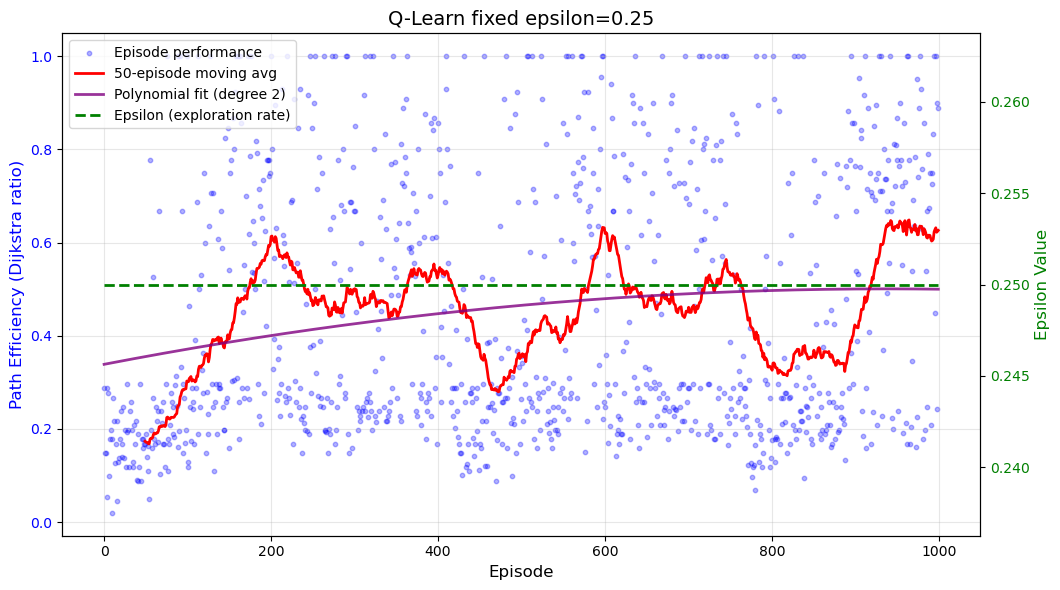

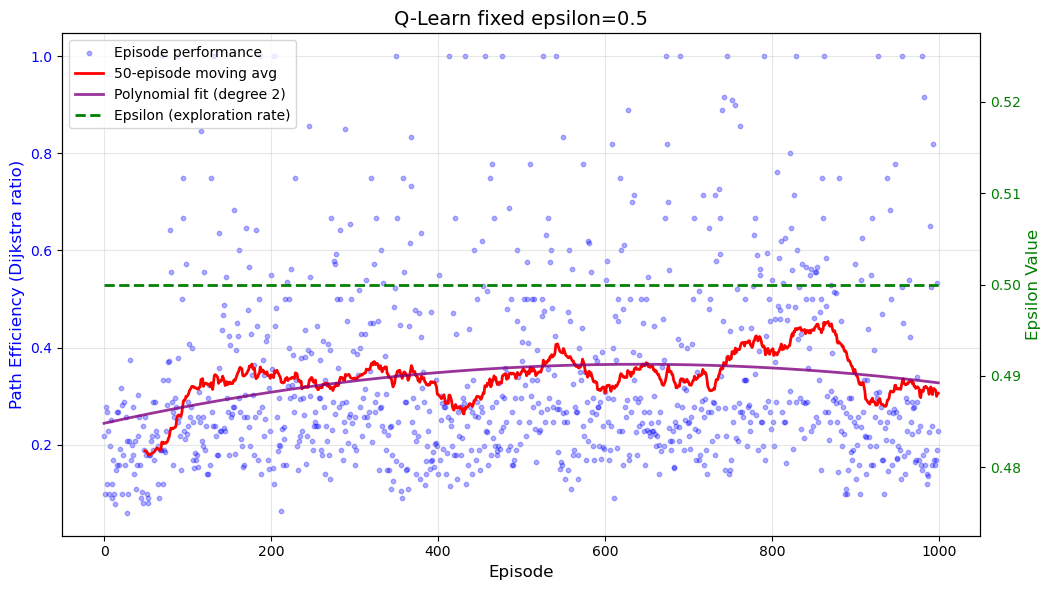

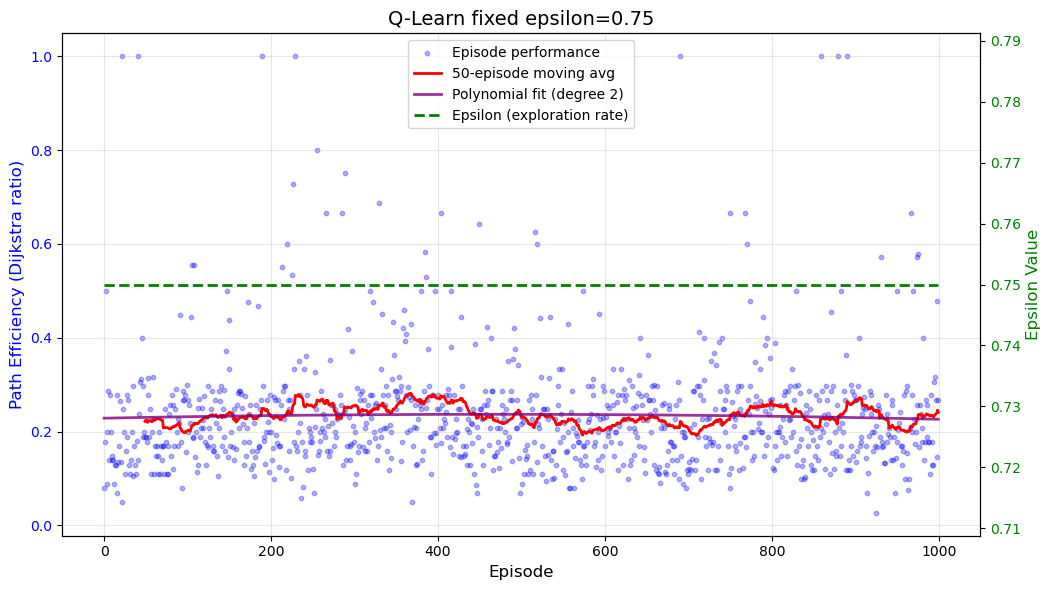

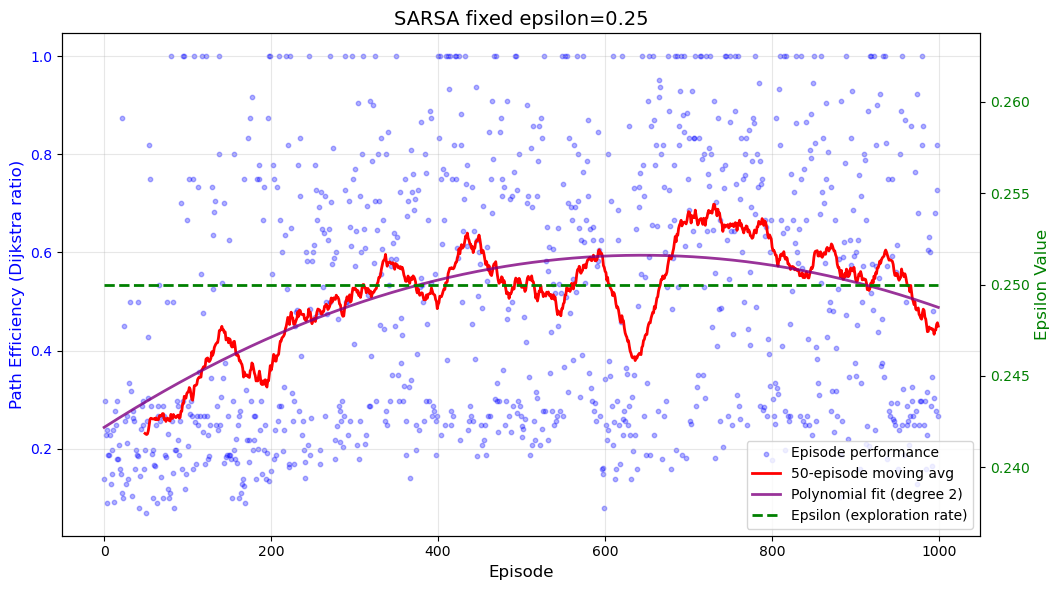

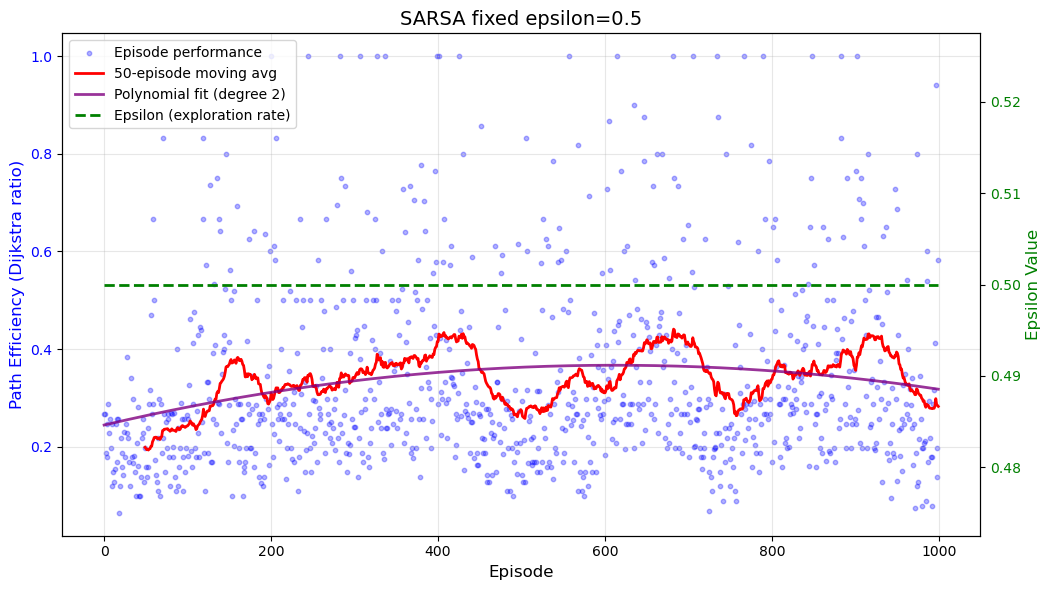

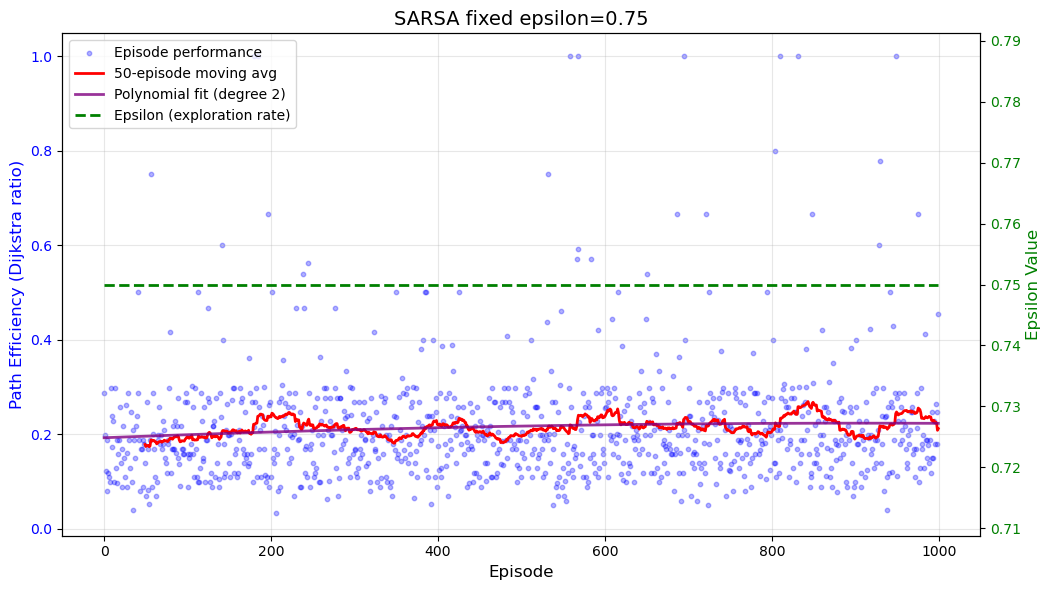

In [ ]:
env = TaskEnv()

# Testing different starting epsilons for Agent 1 (Q-learning)
frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_1_learn(start_epsilon=0.25, epsilon_decay=0, episodes=1000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='Q-Learn fixed epsilon=0.25', poly_degree=2)


frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_1_learn(start_epsilon=0.5, epsilon_decay=0, episodes=1000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='Q-Learn fixed epsilon=0.5', poly_degree=2)
frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_1_learn(start_epsilon=0.75, epsilon_decay=0, episodes=1000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='Q-Learn fixed epsilon=0.75', poly_degree=2)

# Testing different starting epsilons for Agent 2 (SARSA)
frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_2_learn(start_epsilon=0.25, epsilon_decay=0, episodes=1000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='SARSA fixed epsilon=0.25', poly_degree=2)  

frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_2_learn(start_epsilon=0.5, epsilon_decay=0, episodes=1000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='SARSA fixed epsilon=0.5', poly_degree=2)
frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_2_learn(start_epsilon=0.75, epsilon_decay=0, episodes=1000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='SARSA fixed epsilon=0.75', poly_degree=2)



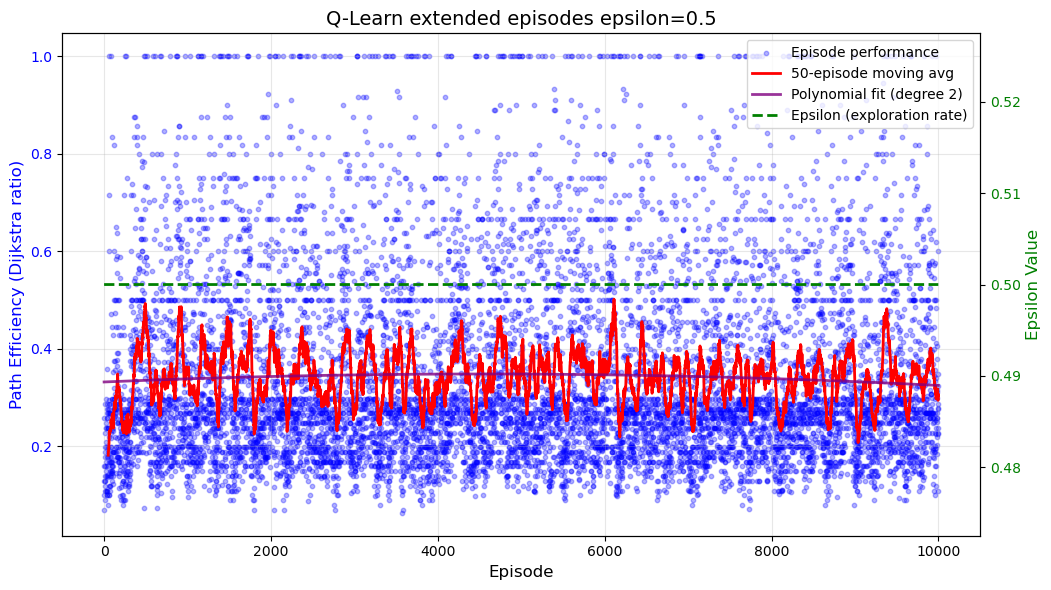

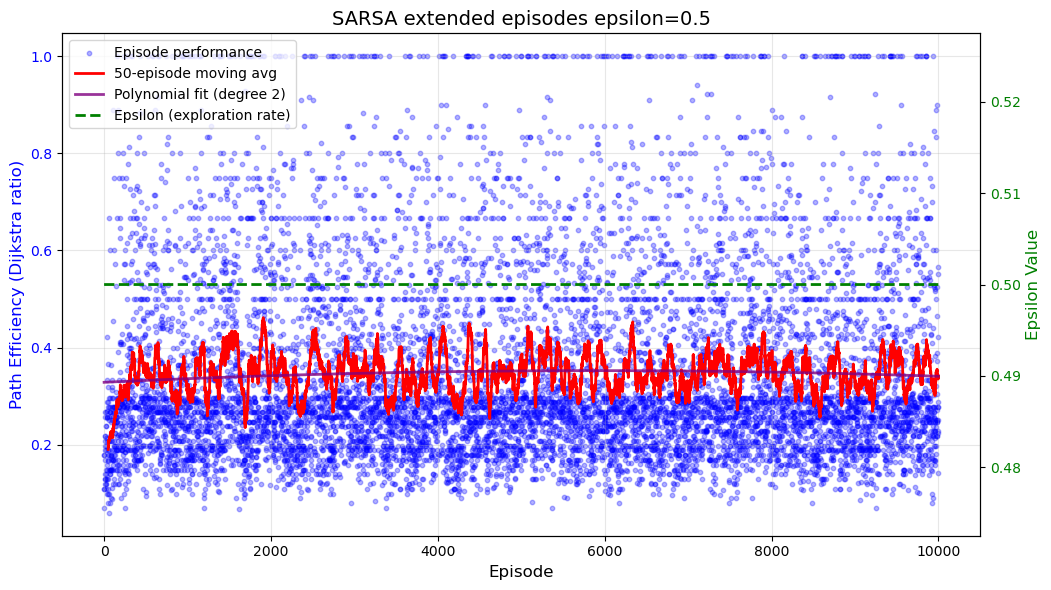

In [123]:
# Extend epsiodes on promising epsilon values
frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_1_learn(start_epsilon=0.5, epsilon_decay=0, episodes=10000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='Q-Learn extended episodes epsilon=0.5', poly_degree=2)  
frames, best_episode_score, best_episode_epsilon, ratios, epsilons = agent_2_learn(start_epsilon=0.5, epsilon_decay=0, episodes=10000, env=env)
plot_learning_curve(ratios, epsilons, window_size=50, title='SARSA extended episodes epsilon=0.5', poly_degree=2)

Learning with gamma of 0.5
1/5 mazes
2/5 mazes
3/5 mazes
4/5 mazes
5/5 mazes
Q-Learning performance: 0.2169
SARSA performance:      0.2182
Q-Learning learns faster than SARSA
Learning with gamma of 0.9
1/5 mazes
2/5 mazes
3/5 mazes
4/5 mazes
5/5 mazes
Q-Learning performance: 0.3510
SARSA performance:      0.3979
Q-Learning learns slower than SARSA
Learning with gamma of 0.99
1/5 mazes
2/5 mazes
3/5 mazes
4/5 mazes
5/5 mazes
Q-Learning performance: 0.4703
SARSA performance:      0.4417
Q-Learning learns slower than SARSA
Training Q-Learning agent...
Training SARSA agent...


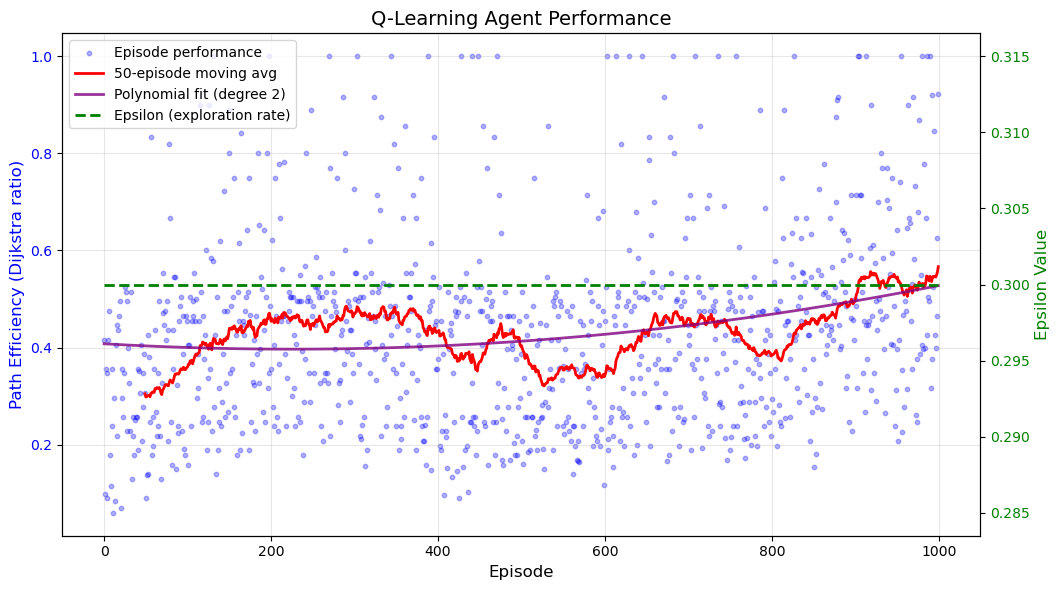

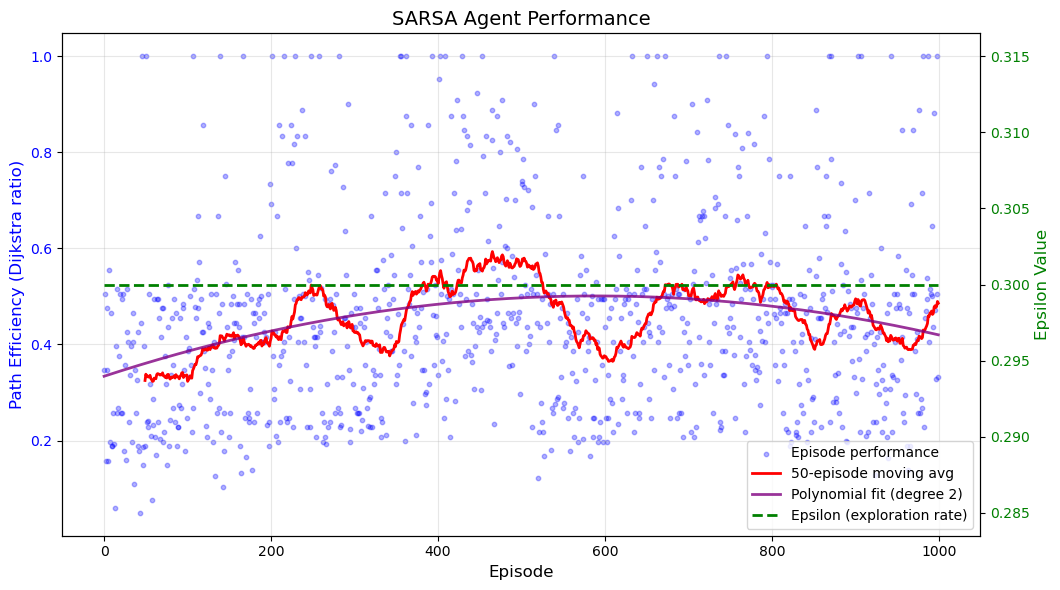

In [124]:
# On-Policy vs Off-Policy comparison
# shared env for fair comparison
env = TaskEnv()

# Different gamma value
gamma_values = [0.5, 0.9, 0.99]
mazes_per_gamma = 5

for gamma in gamma_values:
    print(f"Learning with gamma of {gamma}")

    ql_results = []
    sarsa_results = []

    for maze_iter in range(mazes_per_gamma):
      print(f"{maze_iter+1}/{mazes_per_gamma} mazes")
      env = TaskEnv() 

      frames_ql, score_ql, _, ratios_ql, epsilons_ql = agent_1_learn(
          start_epsilon=0.5, epsilon_decay=0, episodes=1000, gamma=gamma, env=env
      )

      frames_sarsa, score_sarsa, _, ratios_sarsa, epsilons_sarsa = agent_2_learn(
          start_epsilon=0.5, epsilon_decay=0, episodes=1000, gamma=gamma, env=env
      )

      ql_results.append((frames_ql, score_ql, ratios_ql, epsilons_ql))
      sarsa_results.append((frames_sarsa, score_sarsa, ratios_sarsa, epsilons_sarsa))
      
    print(f"Q-Learning performance: {np.mean(ratios_ql[-50:]):.4f}")
    print(f"SARSA performance:      {np.mean(ratios_sarsa[-50:]):.4f}")
    print(f"Q-Learning learns {'faster' if calculate_learning_rate(ratios_ql) > calculate_learning_rate(ratios_sarsa) else 'slower'} than SARSA")
# q-learning(off-policy) vs sarsa(on-policy) fair comparison
env = TaskEnv()

test_epsilon = 0.3

print("Training Q-Learning agent...")
frames_ql, score_ql, _, ratios_ql, epsilons_ql = agent_1_learn(
    start_epsilon=test_epsilon, epsilon_decay=0, episodes=1000, env=env
)

print("Training SARSA agent...")
frames_sarsa, score_sarsa, _, ratios_sarsa, epsilons_sarsa = agent_2_learn(
    start_epsilon=test_epsilon, epsilon_decay=0, episodes=1000, env=env
)

plot_learning_curve(ratios_ql, epsilons_ql, window_size=50, title='Q-Learning Agent Performance', poly_degree=2)
plot_learning_curve(ratios_sarsa, epsilons_sarsa, window_size=50, title='SARSA Agent Performance', poly_degree=2)


Testing with 10 episodes across 5 mazes

  Results for 10 episodes:
    Random Agent: 0.1719
    Q-Learning:   0.1773
    SARSA:        0.1704
    Q-Learning improvement: 3.1%
    SARSA improvement:      -0.9%
Testing with 50 episodes across 5 mazes

  Results for 50 episodes:
    Random Agent: 0.2067
    Q-Learning:   0.2817
    SARSA:        0.2204
    Q-Learning improvement: 36.3%
    SARSA improvement:      6.6%
Testing with 100 episodes across 5 mazes

  Results for 100 episodes:
    Random Agent: 0.1645
    Q-Learning:   0.3231
    SARSA:        0.3035
    Q-Learning improvement: 96.5%
    SARSA improvement:      84.5%
Testing with 500 episodes across 5 mazes

  Results for 500 episodes:
    Random Agent: 0.1926
    Q-Learning:   0.3622
    SARSA:        0.3668
    Q-Learning improvement: 88.1%
    SARSA improvement:      90.5%
Testing with 1000 episodes across 5 mazes

  Results for 1000 episodes:
    Random Agent: 0.2083
    Q-Learning:   0.3968
    SARSA:        0.3691
    Q-L

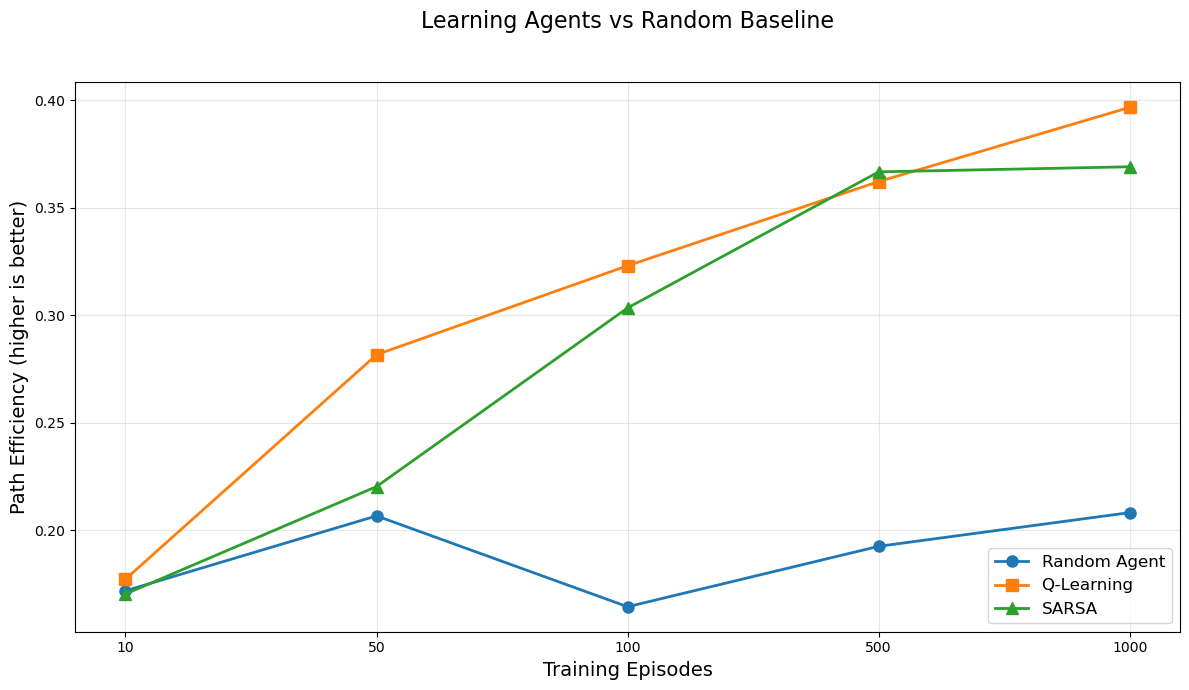

 Episodes Random (mean) Q-Learning (mean) SARSA (mean) QL Improvement SARSA Improvement
       10        0.1719            0.1773       0.1704           3.1%             -0.9%
       50        0.2067            0.2817       0.2204          36.3%              6.6%
      100        0.1645            0.3231       0.3035          96.5%             84.5%
      500        0.1926            0.3622       0.3668          88.1%             90.5%
     1000        0.2083            0.3968       0.3691          90.5%             77.2%


In [ ]:
# Compare random agent to learning agents at different episode counts, with a fixed epsilon of 0.5
def compare_with_random_agent():

    episode_counts = [10, 50, 100, 500, 1000] 
    mazes_per_run = 5
    
    results = {
        'episodes': [],
        'random_mean': [],
        'ql_mean': [],
        'sarsa_mean': [],
    }
    
    for episodes in episode_counts:
        print(f"Testing with {episodes} episodes across {mazes_per_run} mazes")
        
        random_final_performances = []
        ql_final_performances = []
        sarsa_final_performances = []
        
        for maze_idx in range(mazes_per_run):
            env = TaskEnv()

            random_agent = RandomAgent(env)
            random_ratios = []
            
            for episode in range(min(100, episodes)):
                state = env.reset()
                dijkstra = calculate_dijkstra_length(env)
                done = False
                num_actions = 0
                
                while not done:
                    action = random_agent.select_action(state)
                    next_state, reward, done, _ = env.step(action)
                    state = next_state
                    num_actions += 1
                    
                random_ratios.append(dijkstra / num_actions)
            
            random_final_performances.append(np.mean(random_ratios))
            
            _, _, _, ql_ratios, _ = agent_1_learn(
                start_epsilon=0.5, epsilon_decay=0, episodes=episodes, env=env
            )
            final_window = max(10, episodes // 10)
            ql_final_performances.append(np.mean(ql_ratios[-final_window:]))
            
            _, _, _, sarsa_ratios, _ = agent_2_learn(
                start_epsilon=0.5, epsilon_decay=0, episodes=episodes, env=env
            )
            sarsa_final_performances.append(np.mean(sarsa_ratios[-final_window:]))
        
        results['episodes'].append(episodes)
        results['random_mean'].append(np.mean(random_final_performances))
        results['ql_mean'].append(np.mean(ql_final_performances))
        results['sarsa_mean'].append(np.mean(sarsa_final_performances))
        
        print(f"\n  Results for {episodes} episodes:")
        print(f"    Random Agent: {results['random_mean'][-1]:.4f}")
        print(f"    Q-Learning:   {results['ql_mean'][-1]:.4f}")
        print(f"    SARSA:        {results['sarsa_mean'][-1]:.4f}")
        print(f"    Q-Learning improvement: {((results['ql_mean'][-1] - results['random_mean'][-1]) / results['random_mean'][-1] * 100):.1f}%")
        print(f"    SARSA improvement:      {((results['sarsa_mean'][-1] - results['random_mean'][-1]) / results['random_mean'][-1] * 100):.1f}%")
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    x = range(len(episode_counts))
    
    ax.plot(x, results['random_mean'], 
                label='Random Agent', marker='o', linewidth=2, markersize=8)
    ax.plot(x, results['ql_mean'], 
                label='Q-Learning', marker='s', linewidth=2, markersize=8)
    ax.plot(x, results['sarsa_mean'], 
                label='SARSA', marker='^', linewidth=2, markersize=8)
    
    ax.set_xlabel('Training Episodes', fontsize=14)
    ax.set_ylabel('Path Efficiency (higher is better)', fontsize=14)
    ax.set_title('Learning Agents vs Random Baseline\n', 
                 fontsize=16, pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{ep}' for ep in episode_counts])
    ax.legend(fontsize=12, loc='lower right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    df_results = pd.DataFrame({
        'Episodes': episode_counts,
        'Random (mean)': [f"{m:.4f}" for m in results['random_mean']],
        'Q-Learning (mean)': [f"{m:.4f}" for m in results['ql_mean']],
        'SARSA (mean)': [f"{m:.4f}" for m in results['sarsa_mean']],
        'QL Improvement': [f"{((ql-r)/r*100):.1f}%" for ql, r in zip(results['ql_mean'], results['random_mean'])],
        'SARSA Improvement': [f"{((s-r)/r*100):.1f}%" for s, r in zip(results['sarsa_mean'], results['random_mean'])]
    })
    print(df_results.to_string(index=False))

compare_with_random_agent()

# Bonus Tasks 

We would like to challenge you with the following bonus task. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement a third RL agent using another RL algorithm (e.g. Monte Carlo methods, Expected SARSA or even neural network-based ones) and discuss your findings. Compare this third agent with the above ones and explain why this is a better (or worse) RL algorithm. You are allowed to reuse exsiting packages, but please cite them, test them in advance, and make sure that you can explain the used algorithm using your own words.

2. Can you explore and show other evaluation results? If so, implement and present one extra result (e.g. a plot). And please explain why it is a good evaluation method for our task or how it shows the difference between two RL agents/algorithms.